In [1]:
import pandas as pd

In [2]:
data = pd.read_csv ( 'credit_risk_dataset.csv')

In [3]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [10]:
data.loc[data['person_home_ownership']=='RENT' , 'home_own'] = 0  
data.loc[data['person_home_ownership']=='MORTGAGE' , 'home_own'] = 1
data.loc[data['person_home_ownership']=='OWN' , 'home_own'] = 2
data.loc[data['person_home_ownership']=='OTHER' , 'home_own'] = 3

In [12]:
data = data.drop(['person_home_ownership'] , axis=1)

In [15]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [16]:
data.loc[data['loan_intent']=='EDUCATION' , 'loan_intentt'] = 0  
data.loc[data['loan_intent']=='MEDICAL' , 'loan_intentt'] = 1
data.loc[data['loan_intent']=='VENTURE' , 'loan_intentt'] = 2
data.loc[data['loan_intent']=='PERSONAL' , 'loan_intentt'] = 3
data.loc[data['loan_intent']=='DEBTCONSOLIDATION' , 'loan_intentt'] = 4
data.loc[data['loan_intent']=='HOMEIMPROVEMENT' , 'loan_intentt'] = 5

In [18]:
data = data.drop(['loan_intent'] , axis=1)

In [20]:
data['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [22]:
data.loc[data['loan_grade']=='A' , 'loan_gradee'] = 0  
data.loc[data['loan_grade']=='B' , 'loan_gradee'] = 1
data.loc[data['loan_grade']=='C' , 'loan_gradee'] = 2
data.loc[data['loan_grade']=='D' , 'loan_gradee'] = 3
data.loc[data['loan_grade']=='E' , 'loan_gradee'] = 4
data.loc[data['loan_grade']=='F' , 'loan_gradee'] = 5
data.loc[data['loan_grade']=='G' , 'loan_gradee'] = 6

In [24]:
data = data.drop(['loan_grade'] , axis=1)

In [27]:
data['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()
    
data['cb_person_default_on_file'] = label_encoder.fit_transform(data['cb_person_default_on_file'])

In [30]:
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_own,loan_intentt,loan_gradee
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0.0,3.0,3.0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,2.0,0.0,1.0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1.0,1.0,2.0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0.0,1.0,2.0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,0,30,1.0,3.0,2.0
32577,54,120000,4.0,17625,7.49,0,0.15,0,19,1.0,3.0,0.0
32578,65,76000,3.0,35000,10.99,1,0.46,0,28,0.0,5.0,1.0
32579,56,150000,5.0,15000,11.48,0,0.10,0,26,1.0,3.0,1.0


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
X = data.drop(['loan_stat0.s'] , axis=1)
y = data['loan_status']

In [41]:
missing_values = X.isna().any()
print(missing_values)

person_age                    False
person_income                 False
person_emp_length             False
loan_amnt                     False
loan_int_rate                 False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
home_own                      False
loan_intentt                  False
loan_gradee                   False
dtype: bool


In [40]:
X['person_emp_length'].fillna(np.mean(X['person_emp_length']), inplace=True)
X['loan_int_rate'].fillna(np.mean(X['loan_int_rate']), inplace=True)

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [43]:
rf = RandomForestClassifier(n_estimators=100 , min_samples_split = 10 , random_state=42 , min_samples_leaf = 4 , max_depth = 20)

In [44]:
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [45]:
y_pred = rf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.927880926806813


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           32581 non-null  float64
 3   loan_amnt                   32581 non-null  int64  
 4   loan_int_rate               32581 non-null  float64
 5   loan_percent_income         32581 non-null  float64
 6   cb_person_default_on_file   32581 non-null  int32  
 7   cb_person_cred_hist_length  32581 non-null  int64  
 8   home_own                    32581 non-null  float64
 9   loan_intentt                32581 non-null  float64
 10  loan_gradee                 32581 non-null  float64
dtypes: float64(6), int32(1), int64(4)
memory usage: 2.6 MB


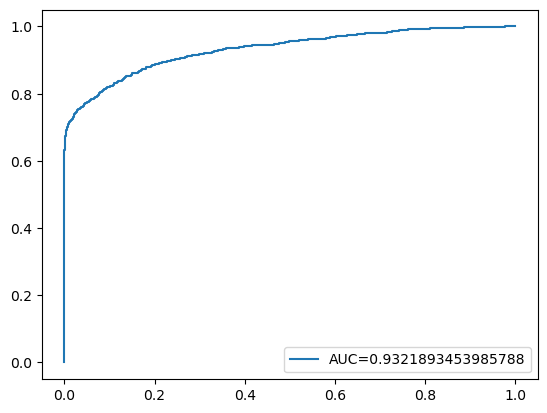

In [47]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

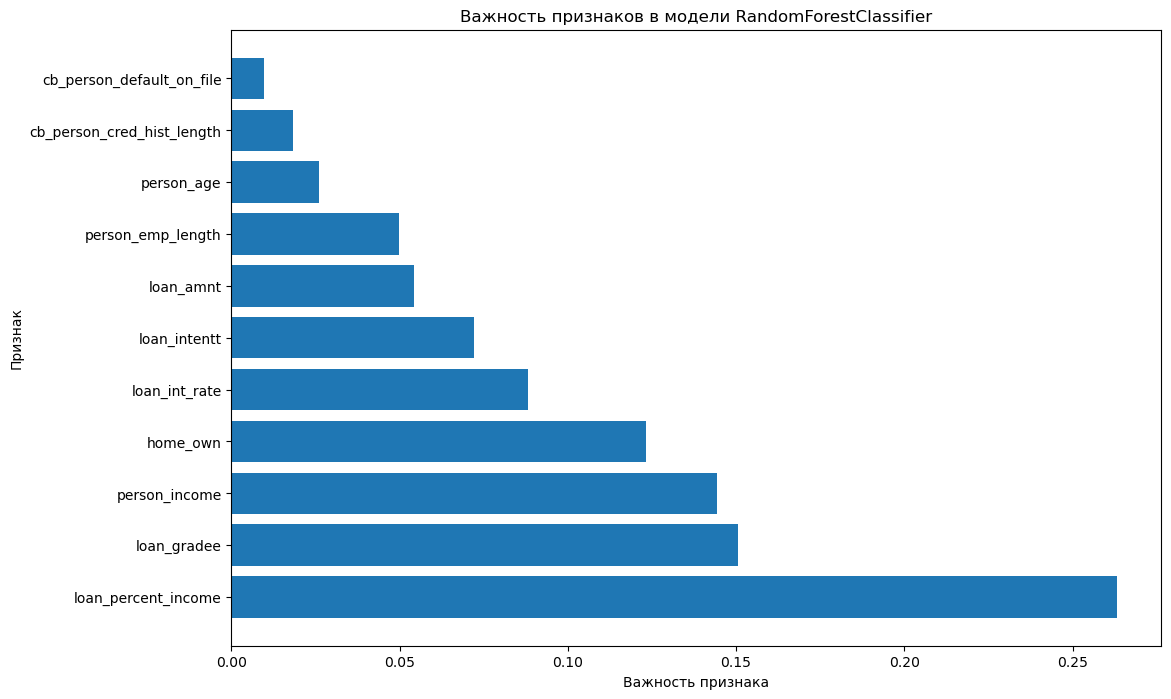

In [48]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в модели RandomForestClassifier')
plt.show()

In [49]:
import pickle

In [50]:
pickle_out = open("CreditScoring.pkl" , "wb")

In [51]:
pickle.dump(rf , pickle_out)

In [52]:
pickle_out.close()